In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mysql.connector
from beautifultable import BeautifulTable
%matplotlib inline

# SQL Statements Challenge Part 1

In [2]:
#We define a wrapper function to print out the SQL Query Results

def print_query(cursor):
    """Function to print out the results of a query
    
    - cursor is a cursor object from a MySQL DataBase
    """
    
    table = BeautifulTable()
    table.column_headers = list(cursor.column_names)
    for row in cursor:
        table.append_row(row)
    print(table)

# Question a

In [3]:
db = mysql.connector.connect(user='root',
                            password='eclipse2',
                            host='127.0.0.1',
                            database='lalamove')
dbcursor = db.cursor()

sql_query = ("SELECT date_format(order_datetime,'%Y-%m-%d %H') as time_hours, COUNT(idvanOrder) as total_orders "+
             "FROM vanorder "+
             "GROUP BY time_hours "+
             "HAVING total_orders>0 "
             "ORDER BY time_hours ASC")

dbcursor.execute(sql_query)

print_query(dbcursor)

dbcursor.close()
db.close()

+---------------+--------------+
|  time_hours   | total_orders |
+---------------+--------------+
| 2017-04-18 07 |      2       |
+---------------+--------------+
| 2017-04-18 08 |      2       |
+---------------+--------------+
| 2017-04-18 09 |      5       |
+---------------+--------------+
| 2017-04-18 10 |      14      |
+---------------+--------------+
| 2017-04-18 11 |      28      |
+---------------+--------------+
| 2017-04-18 12 |      29      |
+---------------+--------------+
| 2017-04-18 13 |      30      |
+---------------+--------------+
| 2017-04-18 14 |      26      |
+---------------+--------------+
| 2017-04-18 15 |      30      |
+---------------+--------------+
| 2017-04-18 16 |      41      |
+---------------+--------------+
| 2017-04-18 17 |      24      |
+---------------+--------------+
| 2017-04-18 18 |      13      |
+---------------+--------------+
| 2017-04-18 19 |      14      |
+---------------+--------------+
| 2017-04-18 20 |      10      |
+---------

## Question b

In [4]:
db = mysql.connector.connect(user='root',
                            password='eclipse2',
                            host='127.0.0.1',
                            database='lalamove')
dbcursor = db.cursor()

sql_query=("SELECT CONCAT('% for customers with 1 order : ', ROUND(SUM(total_price)/(SELECT SUM(total_price) FROM vanorder)*100,2),' %') "+
           "FROM "+
           "(SELECT requestor_client_id, total_price, COUNT(idvanOrder) "+
           "FROM vanorder "+
           "WHERE order_status=2 "+
          "GROUP BY requestor_client_id "+
          "ORDER BY requestor_client_id ASC) AS t ;"+
          "SELECT CONCAT('% for customers >1 order : ', ROUND(SUM(total_price)/(SELECT SUM(total_price) FROM vanorder)*100,2),' %') "+
          "FROM "+
          "(SELECT requestor_client_id, total_price, COUNT(idvanOrder) "+
          "FROM vanorder "+
          "WHERE order_status=2 "+
          "GROUP BY requestor_client_id "+
          "HAVING COUNT(idvanOrder)>1) AS q")

res = dbcursor.execute(sql_query,multi=True)


for result in res:
    print(result)

dbcursor.close()
db.close()

CMySQLCursor: SELECT CONCAT('% for customers with 1 or..
CMySQLCursor: SELECT CONCAT('% for customers >1 order ..


## Question c

In [5]:
db = mysql.connector.connect(user='root',
                            password='eclipse2',
                            host='127.0.0.1',
                            database='lalamove')
dbcursor = db.cursor()

sql_query=("SELECT requestor_client_id, SUM(CASE WHEN order_status=2 THEN total_price ELSE 0 END) as total_spent, "+
          "SUM(CASE WHEN order_status=2 THEN 1 ELSE 0 END) as total_orders_completed "+
          "FROM vanorder GROUP BY requestor_client_id HAVING total_orders_completed>0 "+
          "ORDER BY total_spent DESC, total_orders_completed DESC")


dbcursor.execute(sql_query)

print_query(dbcursor)

dbcursor.close()
db.close()

+---------------------+-------------+------------------------+
| requestor_client_id | total_spent | total_orders_completed |
+---------------------+-------------+------------------------+
|         48          |    1904     |           8            |
+---------------------+-------------+------------------------+
|         197         |    1710     |           1            |
+---------------------+-------------+------------------------+
|         16          |    1332     |           1            |
+---------------------+-------------+------------------------+
|         17          |    1190     |           1            |
+---------------------+-------------+------------------------+
|         10          |    1115     |           1            |
+---------------------+-------------+------------------------+
|         14          |     906     |           5            |
+---------------------+-------------+------------------------+
|         213         |     843     |           2      

## Question d

In [6]:
db = mysql.connector.connect(user='root',
                            password='eclipse2',
                            host='127.0.0.1',
                            database='lalamove')
dbcursor = db.cursor()

sql_query=("SELECT servicer_auth, SUM(CASE WHEN order_status=2 THEN total_price ELSE 0 END) as total_income, "+
          "SUM(CASE WHEN order_status=2 THEN 1 ELSE 0 END) as total_orders_completed "+
          "FROM vanorder "+
          "WHERE servicer_auth IS NOT NULL "+
          "GROUP BY servicer_auth "+
          "ORDER BY total_income DESC, total_orders_completed DESC")

dbcursor.execute(sql_query)

print_query(dbcursor)

dbcursor.close()
db.close()

+---------------+--------------+------------------------+
| servicer_auth | total_income | total_orders_completed |
+---------------+--------------+------------------------+
|      96       |     1710     |           1            |
+---------------+--------------+------------------------+
|      150      |     1332     |           1            |
+---------------+--------------+------------------------+
|      266      |     1190     |           1            |
+---------------+--------------+------------------------+
|      252      |     1115     |           1            |
+---------------+--------------+------------------------+
|      97       |     755      |           2            |
+---------------+--------------+------------------------+
|      202      |     632      |           2            |
+---------------+--------------+------------------------+
|      145      |     615      |           1            |
+---------------+--------------+------------------------+
|      146    

## Question e

In [7]:
db = mysql.connector.connect(user='root',
                            password='eclipse2',
                            host='127.0.0.1',
                            database='lalamove')
dbcursor = db.cursor()

sql_query=("SELECT DISTINCT servicer_auth FROM vanorder WHERE order_status<>2 AND servicer_auth IS NOT NULL")

dbcursor.execute(sql_query)

print_query(dbcursor)

dbcursor.close()
db.close()

+---------------+
| servicer_auth |
+---------------+
|      21       |
+---------------+


# Challenge Part 2 

In [8]:
response_data = pd.read_csv('response_data.csv',header=[0],parse_dates = [0,1])

In [9]:
response_data.head()

,Driver Response Timestamp,Order Create Timestamp,Order Id
0,2017-03-24 22:58:31,2017-03-24 22:57:38,1
1,2017-03-25 01:04:53,2017-03-25 01:04:53,2
2,2017-03-25 01:06:16,2017-03-25 01:06:16,3
3,2017-03-25 01:08:40,2017-03-25 01:07:03,4
4,2017-03-25 02:34:18,2017-03-25 02:34:08,5


In [10]:
response_data.shape

(5000, 3)

## Test of the impact of change at 2017-03-30 12:00:00 AM

We are going to separate the DataFrame Object into two variables to explore all orders created before and after the change occured

We first start by adding a column Order Match Time, estimated in seconds. We convert the timedelta into a float type for easier manipulation.

In [11]:
response_data['Order Match Time']=response_data['Driver Response Timestamp']-response_data['Order Create Timestamp']
response_data['Order Match Time']/= np.timedelta64(1, 's')

We add a boolean column named "after_change" to make use of pandas filtering and seaborn library's FacetGrid for easier visualisation

In [12]:
changetime = '2017-03-30 00:00:00'
response_data['after_change'] = response_data['Order Create Timestamp']>changetime

C:\Users\Stephane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
C:\Users\Stephane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


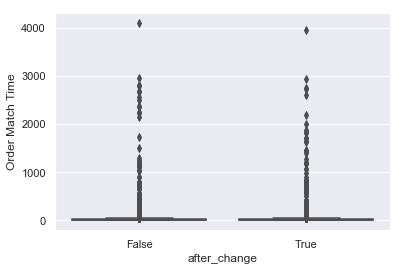

In [13]:
sns.set(color_codes=True)
sns.boxplot(x='after_change',y='Order Match Time',data=response_data)

The boxplot seems to show that because of the very few large outliers around 4000 seconds of response time this effectively flattens down the boxplots preventing any interpretation.

In [14]:
response_data[response_data['after_change']==False].describe()

,Order Id,Order Match Time
count,2598.000000,2598.000000
mean,1299.500000,47.854888
std,750.122323,216.946677
min,1.000000,0.000000
25%,650.250000,9.000000
50%,1299.500000,12.500000
75%,1948.750000,25.000000
max,2598.000000,4102.000000


In [15]:
response_data[response_data['after_change']==True].describe()

,Order Id,Order Match Time
count,2402.000000,2402.000000
mean,3799.500000,50.012073
std,693.541996,208.285455
min,2599.000000,0.000000
25%,3199.250000,9.000000
50%,3799.500000,11.000000
75%,4399.750000,26.000000
max,5000.000000,3945.000000


We will filter out the extreme outliers by using the 95th percentile 

In [16]:
quantile = response_data['Order Match Time'].quantile(q=0.95)
response_data = response_data[response_data['Order Match Time']<quantile]

Gather The 25%, Median, 75%, Maximum and Minimum at 1.5x the quartiles

In [17]:
summary_before_change = response_data[response_data['after_change']==False].describe()
summary_after_change = response_data[response_data['after_change']==True].describe()

lowerquartile_bf, median_bf, upperquartile_bf = summary_before_change.iloc[4:7,1]
lowerquartile_af, median_af, upperquartile_af = summary_after_change.iloc[4:7,1]

IQR_af = upperquartile_bf-lowerquartile_bf
IQR_bf = upperquartile_af-lowerquartile_af

Check the summary statistics again to see if it seems coherent 

In [18]:
summary_before_change

,Order Id,Order Match Time
count,2481.000000,2481.000000
mean,1294.027408,18.810157
std,750.901137,14.763998
min,1.000000,0.000000
25%,643.000000,9.000000
50%,1288.000000,12.000000
75%,1947.000000,23.000000
max,2598.000000,85.000000


In [19]:
summary_after_change

,Order Id,Order Match Time
count,2268.000000,2268.000000
mean,3808.305115,18.789683
std,695.675571,16.626289
min,2599.000000,0.000000
25%,3204.750000,8.000000
50%,3813.500000,11.000000
75%,4409.250000,22.250000
max,5000.000000,88.000000


### Number of outliers based on the boxplot at 1.5x lower and upper quartile

In [20]:
print('Number of outliers Before Change : '+
    str(len(response_data[(response_data['after_change']==False) & (response_data['Order Match Time']<lowerquartile_bf-1.5*IQR_bf) | 
                        (response_data['Order Match Time']>upperquartile_bf+1.5*IQR_bf)])))
print('Number of outliers After Change : '+
    str(len(response_data[(response_data['after_change']==True) & (response_data['Order Match Time']<lowerquartile_af-1.5*IQR_af) | 
                        (response_data['Order Match Time']>upperquartile_af+1.5*IQR_af)])))

Number of outliers Before Change : 452
Number of outliers After Change : 468


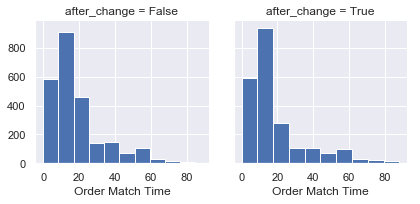

In [21]:
sns.set(color_codes=True)
g = sns.FacetGrid(response_data, col="after_change")
g.map(plt.hist, "Order Match Time")

Let's get the basic statistical description of the order match time before and after the change